In [1]:
#importing library
import numpy as np
import pandas as pd
import nltk
from matplotlib import pyplot
%matplotlib inline
from textblob import TextBlob
import seaborn as sns

In [2]:
# read data
dataFrameTraining = pd.read_csv("data/Toxic_train_set.csv")
dataFrameTesting = pd.read_csv("data/Toxic_test_set.csv")

dftr = dataFrameTraining
dfte = dataFrameTesting

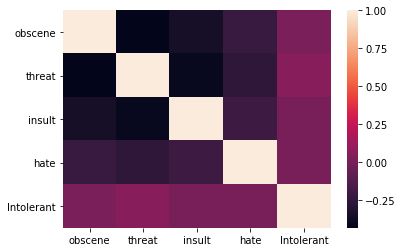

In [3]:
# Calculating the correlation matrix
corr = dftr.corr()
# Generating a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

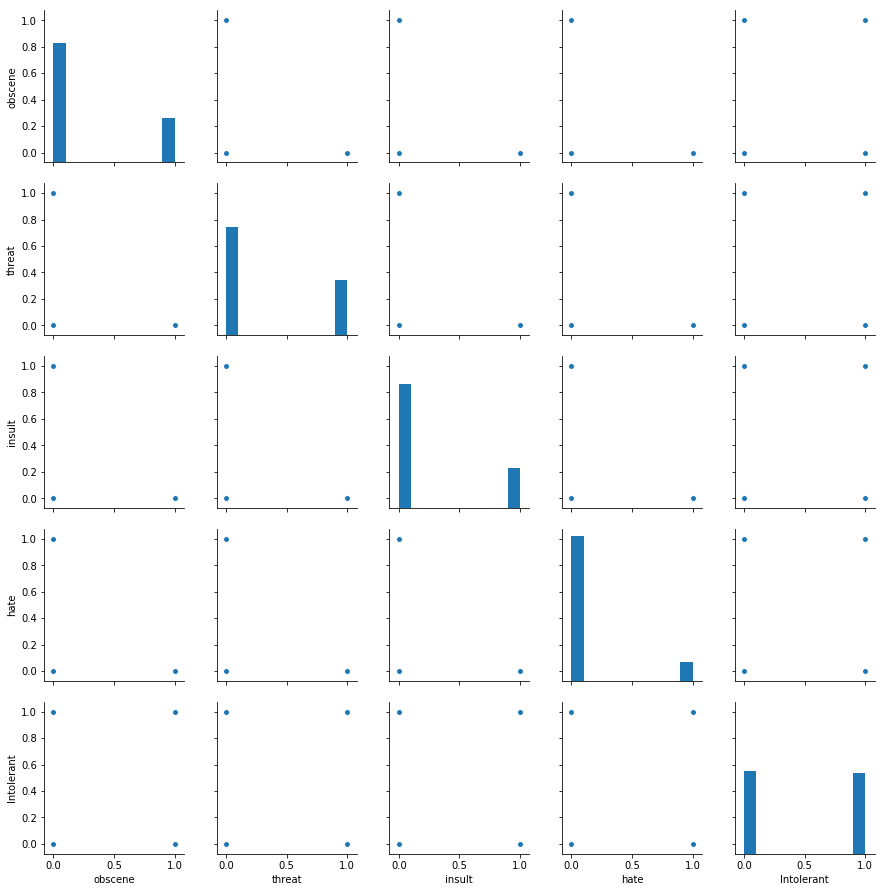

In [5]:
sns.pairplot(dftr)

## Creating new feature: 
### 1. comment_lenght

In [9]:
#comment length with out space as feature
dftr['comment_length'] = dftr['Comments'].apply(lambda x: len(x) - x.count(" "))

In [10]:
dftr.head()

,Comments,obscene,threat,insult,hate,Intolerant,comment_length
0,I will break the neck of this muslim boy who i...,0,1,0,0,0,62
1,Can any one help me to break the neck of my ne...,0,1,0,0,0,49
2,We should break the neck of all the muslims.,0,1,0,0,1,36
3,Everyone should unite and break the neck of th...,0,1,0,0,1,50
4,Let's group up and kill Ahmed.,0,1,0,0,0,25


### 2. Sentiment polarity

In [11]:
def polarityReturn(text):    
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

In [14]:
# adding new feature of sentiment polarity rating
dftr['sentiment'] = dftr['Comments'].apply(polarityReturn)

In [15]:
dftr.head()

,Comments,obscene,threat,insult,hate,Intolerant,comment_length,sentiment
0,I will break the neck of this muslim boy who i...,0,1,0,0,0,62,-0.4
1,Can any one help me to break the neck of my ne...,0,1,0,0,0,49,0.0
2,We should break the neck of all the muslims.,0,1,0,0,1,36,0.0
3,Everyone should unite and break the neck of th...,0,1,0,0,1,50,0.0
4,Let's group up and kill Ahmed.,0,1,0,0,0,25,0.0


### Evaluate created features

C:\Users\subash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\subash\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "uppper left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


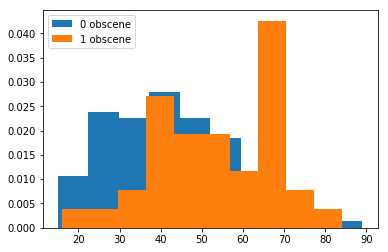

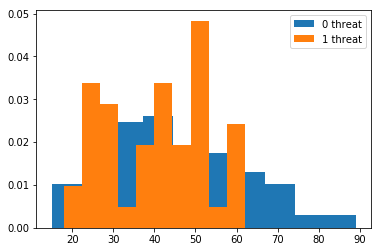

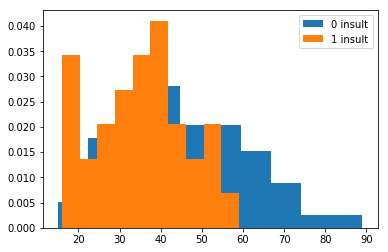

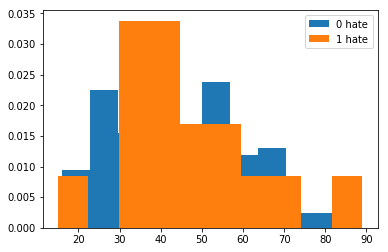

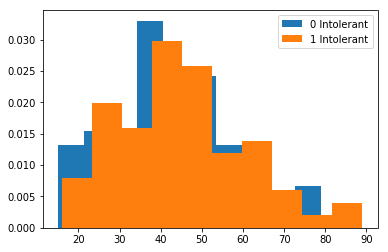

In [51]:
# obscene vs comment_length
labels = dftr.columns[1:-2]
bins = np.linspace(0, 100, 20)

for label in labels:    
    pyplot.hist(dftr[dftr[label]==0]['comment_length'], normed=True, label='0 '+label)
    pyplot.hist(dftr[dftr[label]==1]['comment_length'], normed=True, label='1 '+label)

    pyplot.legend(loc='uppper left')
    pyplot.show()    

C:\Users\subash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\subash\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "uppper left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


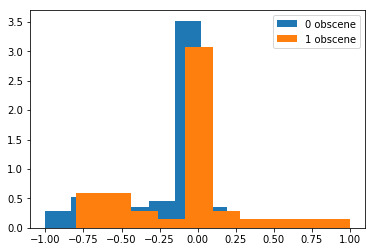

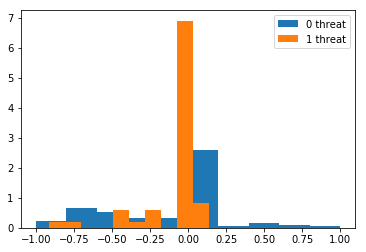

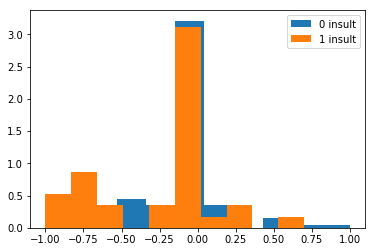

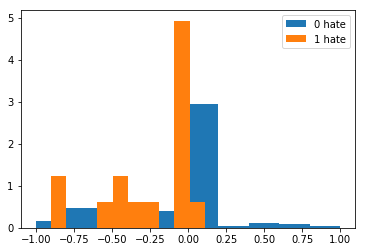

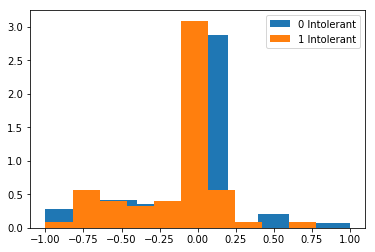

In [50]:
labels = dftr.columns[1:-2]
for label in labels:    
    pyplot.hist(dftr[dftr[label]==0]['sentiment'], normed=True, label='0 '+label)
    pyplot.hist(dftr[dftr[label]==1]['sentiment'], normed=True, label='1 '+label)

    pyplot.legend(loc='uppper left')
    pyplot.show()    

### Checking for transformation of new features

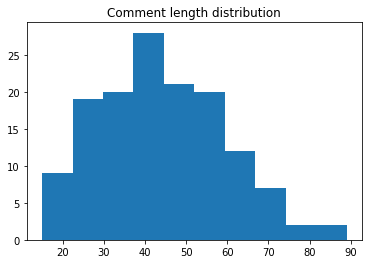

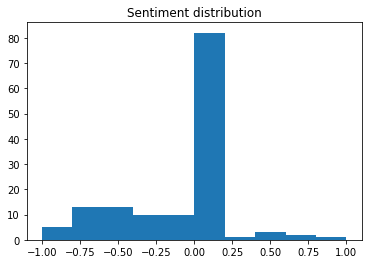

In [56]:
pyplot.hist(dftr.comment_length)
pyplot.title("Comment length distribution")
pyplot.show()

pyplot.hist(dftr.sentiment)
pyplot.title("Sentiment distribution")
pyplot.show()

### Save to new csv

In [58]:
# finally save to preprocessed folder
dftr.to_csv("data/fetr.csv", sep=',', encoding='utf-8', index=False)
dfte.to_csv("data/fete.csv", sep=',', encoding='utf-8', index=False)